In [1]:
import torch
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

SEED = 34

In [2]:
# 파이썬 버전 확인
print("Python 버전:", sys.version)

# TensorFlow 버전 확인
print("TensorFlow 버전:", tf.__version__)

#cudnn 버전 확인
print(torch.backends.cudnn.version())

#cuda version
!nvcc --version

Python 버전: 3.7.16 (default, Jan 17 2023, 16:06:28) [MSC v.1916 64 bit (AMD64)]
TensorFlow 버전: 2.9.1
8302
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_Mar__8_18:36:24_Pacific_Standard_Time_2022
Cuda compilation tools, release 11.6, V11.6.124
Build cuda_11.6.r11.6/compiler.31057947_0


In [3]:
# 데이터를 불러오는 코드를 작성해주세요.
mnist = keras.datasets.mnist
((train_images, train_labels) , (test_images, test_labels)) = mnist.load_data()

In [42]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [4]:
#데이터 개수 및 이미지 사이즈

print(f"train_images: {train_images.shape}")
print(f"train_labels: {train_labels.shape}")

print(f"test__images: {test_images.shape}")
print(f"test_labels: {test_labels.shape}")

train_images: (60000, 28, 28)
train_labels: (60000,)
test__images: (10000, 28, 28)
test_labels: (10000,)


In [5]:
train_images[5].shape

(28, 28)

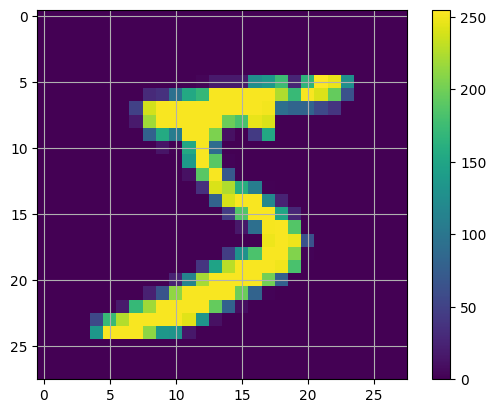

5


In [6]:
# 이마지 샘플 확인

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()
print(train_labels[0])

In [7]:
# 0이 아닌 값 추출해보기
sorted(list(filter(lambda x:x !=0, train_images[0].reshape(-1))))[:5] #filter는 앞에 조건이 참일때 실행가능

[1, 1, 2, 2, 2]

In [8]:
#객체 타입 확인
print(type(train_images))
print(type(train_labels))
print(type(test_images))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
# data type 확인
print(train_images.dtype)
print(train_labels.dtype)
print(test_images.dtype)
print(test_labels.dtype)

uint8
uint8
uint8
uint8


# 이미지 값 정규화를 위한 Min, Max 값 추출

In [10]:
print(list(filter(lambda x:x !=0, train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x:x !=0, train_labels.reshape(-1)))[:10])
print(list(filter(lambda x:x !=0, test_images[0].reshape(-1)))[:10])
print(list(filter(lambda x:x !=0, test_labels.reshape(-1)))[:10])

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]
[5, 4, 1, 9, 2, 1, 3, 1, 4, 3]
[84, 185, 159, 151, 60, 36, 222, 254, 254, 254]
[7, 2, 1, 4, 1, 4, 9, 5, 9, 6]


In [11]:
#이미지 최대 최소값 추출
print(max(train_images.reshape(-1)), min(train_images.reshape(-1))) #-1로 1차원 만들어주기
print(max(test_images.reshape(-1)), min(test_images.reshape(-1)))

255 0
255 0


In [12]:
train_images=train_images.astype(np.float64)
test_images=test_images.astype(np.float64)

In [13]:
# Min-Max scaler를 통해 이미지 정규화 진행
train_images=train_images/255
test_images=test_images/255

# 시각화

In [14]:
train_images[:5].shape #장수, 높이 넓이

(5, 28, 28)

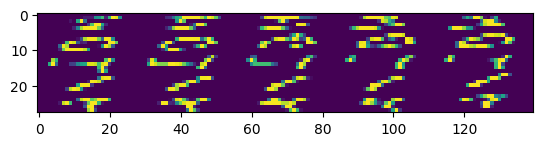

In [15]:
plt.imshow(train_images[:5].reshape(28,28*5))

In [16]:
# 5징 한번에 시각화 5장 수평으로 펼쳐주기
# height, img_height, img_width의 shape을 image_height, image_width*height 로 바꿔줄 수 있음
np.hstack(train_images[:5]).shape #맨앞에 5, 28을 한차원으로 합쳐준다고 생각하기

(28, 140)

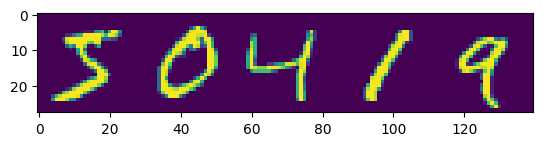

In [17]:
plt.imshow(np.hstack(train_images[:5]))

In [18]:
# transpose 활용
# transpose(1,0,2)=>원래 차원은 0,1,2지만 순서를 바꿔주고 reshape으로 28,140 형태로 바꿔줌
train_images[:5].transpose((1,0,2)).reshape(28,-1).shape

(28, 140)

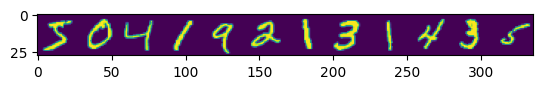

In [19]:
# 5개 숫자 한번에 출력
plt.imshow(train_images[:12].transpose( (1, 0, 2) ).reshape(28, -1))
plt.show()

In [20]:
train_images[:12].shape

(12, 28, 28)

In [21]:
train_images[:12].transpose( (1, 0, 2) ).shape

(28, 12, 28)

In [22]:
train_images[:12].transpose( (1, 0, 2) ).reshape(28,-1).shape

(28, 336)

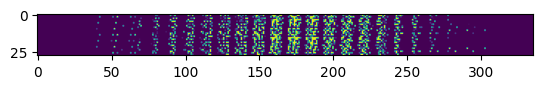

In [23]:
# 5개 숫자 한번에 출력
plt.imshow(train_images[:12].reshape(28, -1, order='F'))
plt.show()

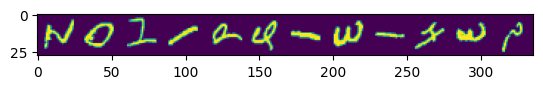

In [24]:
plt.imshow(train_images[:12].transpose( (2, 0, 1) ).reshape(28, -1))
plt.show()

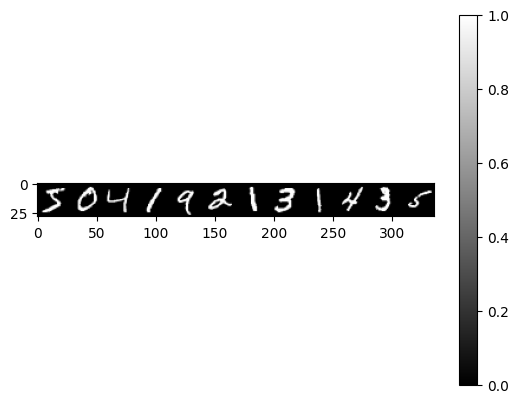

[5 0 4 1 9 2 1 3 1 4 3 5]


In [25]:
# images와 labels 5개를 출력하는 코드를 작성하세요.
plt.imshow(train_images[:12].transpose( (1, 0, 2) ).reshape(28, -1), cmap="gray")
plt.colorbar()
plt.show()
print(train_labels[:12])

# Data augmentation

In [26]:
# random noise 추가
np.random.random((28,28)).shape

(28, 28)

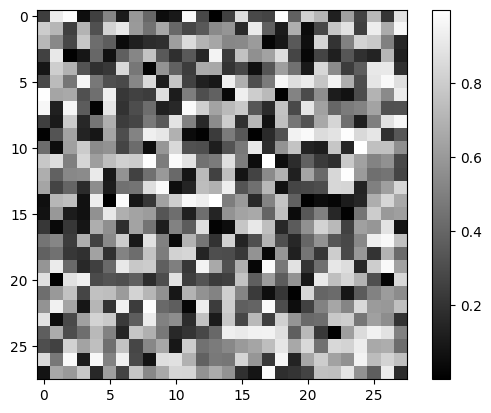

In [27]:
plt.imshow(np.random.random((28,28)),cmap='gray')
plt.colorbar()
plt.show()

In [28]:
# 가우시안 노이즈 함수
np.random.normal(0.0,0.1,5)

array([-0.08784513,  0.071452  , -0.27795573,  0.02073249, -0.02564399])

In [29]:
# 가우시안 노이즈 함수
np.random.normal(3,0.01,1) #평균=3, 표준편차=0.01, size=1

array([2.99973282])

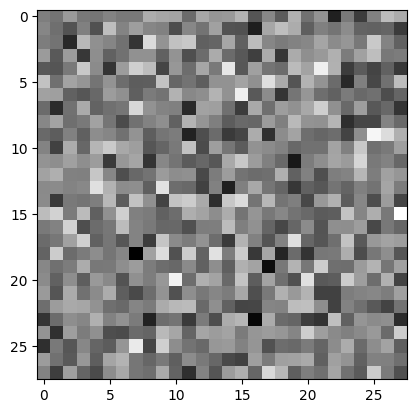

In [30]:
plt.imshow(np.random.normal(3,0.01,(28,28)),cmap='gray')

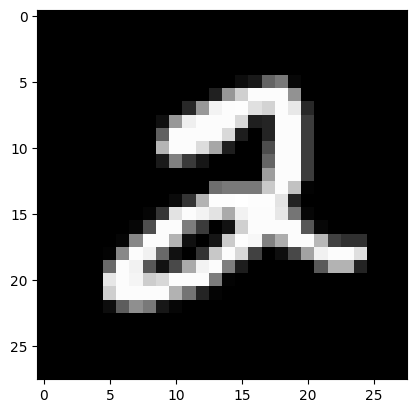

In [31]:
plt.imshow(train_images[5],cmap='gray')

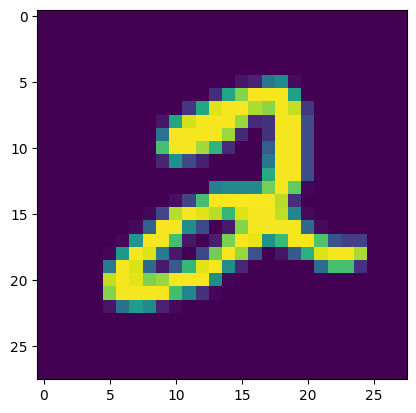

In [32]:
plt.imshow(train_images[5])
plt.show()

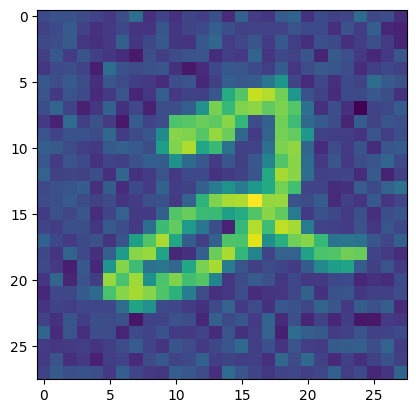

In [33]:
noisy_image=train_images[5]+np.random.normal(0.5,0.1,(28,28))
plt.imshow(noisy_image)
plt.show()

# 원본 이미지 그대로 RNN 적용

In [34]:
# train/test labels에 onehot encoding을 적용하여 shape을 (배치사이즈,) 에서 (배치사이즈, 클래스 개수)로 변경하는 코드를 작성하세요.
from keras.utils import to_categorical
print(train_labels.shape, test_labels.shape)

(60000,) (10000,)


In [35]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [36]:
# One Hot Encoding
train_labels = to_categorical( train_labels, 10)
test_labels=to_categorical(test_labels,10)
print(train_labels) #10개의 클래스를 가진 백터형태

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [37]:
# input (28, 28), 64 unit의 simple RNN, 10 unit의 fully-conntect를 가진 모델을 작성하세요.
from keras.layers import SimpleRNN
from keras.layers import Dense, Input #fully connected, Input layer
from keras.models import Model #model구축에 필요한 라이브러리

inputs = Input(shape=(28, 28)) #모델에 input shape
x1 = SimpleRNN(128, activation="tanh",return_sequences=True)(inputs) #unit개수
x2 = SimpleRNN(64,activation='tanh')(x1)
x3 = Dense(32, activation="relu")(x2)  # Dense 레이어 추가
x4 = Dense(10, activation="softmax")(x3) #분류 클래스 개수
model = Model(inputs, x4) #input, output으로 구성

In [38]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 28, 128)           20096     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 34,858
Trainable params: 34,858
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [40]:
hist=model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=5,verbose=2)

Epoch 1/5
1875/1875 - 121s - loss: 0.3793 - accuracy: 0.8855 - val_loss: 0.2002 - val_accuracy: 0.9411 - 121s/epoch - 64ms/step
Epoch 2/5
1875/1875 - 117s - loss: 0.2070 - accuracy: 0.9390 - val_loss: 0.1579 - val_accuracy: 0.9546 - 117s/epoch - 63ms/step
Epoch 3/5
1875/1875 - 118s - loss: 0.1821 - accuracy: 0.9464 - val_loss: 0.1943 - val_accuracy: 0.9452 - 118s/epoch - 63ms/step
Epoch 4/5
1875/1875 - 116s - loss: 0.1638 - accuracy: 0.9529 - val_loss: 0.2267 - val_accuracy: 0.9335 - 116s/epoch - 62ms/step
Epoch 5/5
1875/1875 - 116s - loss: 0.1609 - accuracy: 0.9539 - val_loss: 0.1443 - val_accuracy: 0.9585 - 116s/epoch - 62ms/step


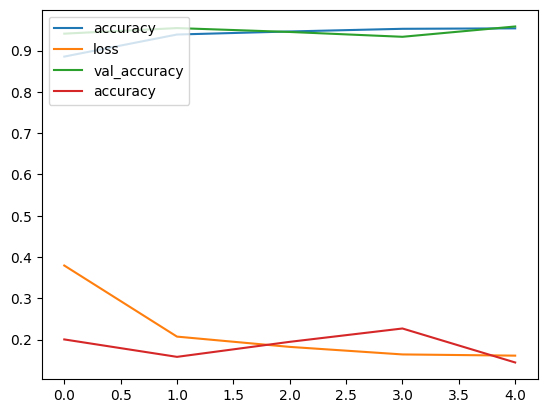

In [41]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.plot(hist.history['val_loss'],label='accuracy')
plt.legend(loc='upper left')
plt.show()

In [56]:
res=model.predict(test_images[:1])

1/1 [==============================] - 0s 29ms/step


In [58]:
res.shape

(1, 10)

In [59]:
res.argmax()

7

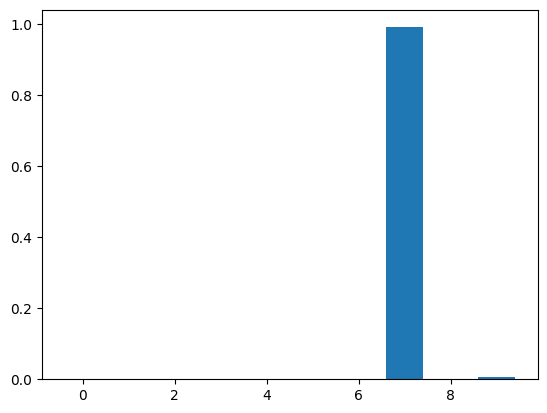

In [60]:
plt.bar(range(10),res[0])
plt.show()

In [61]:
# 모델 저장

In [62]:
model.save('./RNN.h5')

In [64]:
# 모델 load
new_model=tf.keras.models.load_model('./RNN.h5')

In [66]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 28, 128)           20096     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 34,858
Trainable params: 34,858
Non-trainable params: 0
_________________________________________________________________


In [68]:
new_model.predict(test_images[:7])

1/1 [==============================] - 0s 179ms/step


array([[1.8666526e-05, 7.6862343e-05, 1.5036664e-04, 1.0790600e-03,
        1.3715228e-04, 2.5487281e-04, 1.7919095e-07, 9.9067676e-01,
        3.3474753e-05, 7.5726430e-03],
       [1.0179647e-03, 6.7128503e-04, 9.9608058e-01, 6.3019368e-04,
        2.1453225e-05, 7.0533961e-06, 1.8515992e-04, 5.3010372e-05,
        1.2794458e-03, 5.3863652e-05],
       [2.4752069e-07, 9.9620903e-01, 8.8138226e-04, 2.9582976e-04,
        7.8710917e-05, 5.0124021e-05, 7.1156637e-06, 1.3490891e-03,
        9.6055784e-04, 1.6785195e-04],
       [9.9607432e-01, 1.6683845e-05, 6.8075227e-04, 3.1751228e-04,
        2.0502021e-05, 7.5971399e-04, 1.7238453e-03, 2.0690957e-05,
        2.0972935e-04, 1.7616841e-04],
       [1.5234827e-05, 1.7440896e-05, 4.9953017e-04, 3.8591130e-05,
        9.9431604e-01, 3.7137337e-04, 6.3277653e-04, 8.0990023e-05,
        8.6742410e-05, 3.9412258e-03],
       [1.8813765e-07, 9.9687082e-01, 5.7537248e-04, 1.6041941e-04,
        1.0514724e-04, 3.5873658e-05, 5.2406322e-06, 1.27

In [69]:
new_model.evaluate(test_images,test_labels,verbose=2)

313/313 - 6s - loss: 0.1443 - accuracy: 0.9585 - 6s/epoch - 20ms/step


[0.1443227231502533, 0.9585000276565552]